<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_007_GradientDescentClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
from sklearn.datasets import make_regression

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
X,y = make_regression(n_samples=20, n_features=1,n_targets=1,n_informative=1,noise=8)

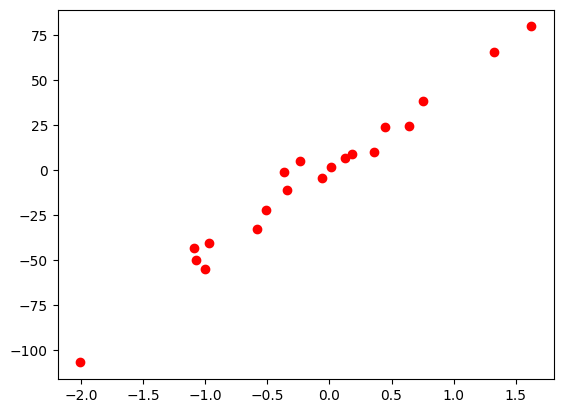

In [244]:
plt.scatter(X,y,color='red')

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [248]:
lr = LinearRegression()

In [249]:
lr.fit(X_train,y_train)

LinearRegression()

In [250]:
lr.coef_ , lr.intercept_

(array([49.16523244]), np.float64(1.5888768970205005))

In [251]:
r2_score(y_test, lr.predict(X_test))

0.9862576540425083

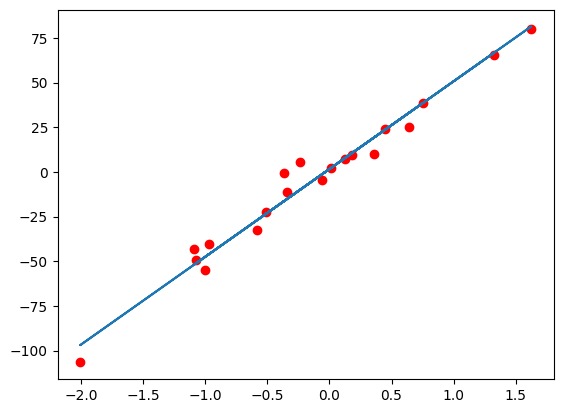

In [252]:
plt.scatter(X,y,color='red')
x_points = X.ravel()
plt.plot(x_points, lr.coef_ * x_points + lr.intercept_)

Gradient Descent Class   implemented for both coef_ and intercept_

In [285]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.coef_ = -100
    self.intercept_ = -200
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, X,y):
    for epoch in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.coef_*X.ravel() - self.intercept_)              # obtain using dL / db
      loss_slope_m = -2* np.sum((y - self.coef_*X.ravel() - self.intercept_)*X.ravel())   # obtain using dL / dm

      self.intercept_ = self.intercept_ - self.lr*loss_slope_b
      self.coef_ = self.coef_ - self.lr*loss_slope_m

  def predict(self,X):
    return self.coef_ * X + self.intercept_

In [289]:
gd = GDRegressor(0.01,1000)

In [290]:
gd.fit(X,y)

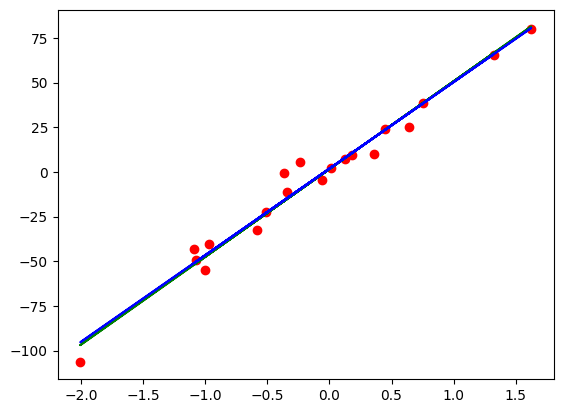

In [295]:
plt.scatter(X,y,color='red')
x_points = X.ravel()
plt.plot(x_points, lr.predict(x_points.reshape(-1,1)), color='green')
plt.plot(x_points, gd.predict(x_points), color='blue')

In [296]:
r2_score(y_test,gd.predict(X_test))

0.9874078850624473